# Focus on FUR and FCS Transactions  

by Fred Etter - November, 2019

In [1]:
# Import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import sklearn
from sklearn.feature_selection import SelectFromModel
from datetime import datetime
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
# Read in the data

df = pd.read_csv('sends.csv', low_memory=False)
df_march = pd.read_csv('march.csv', low_memory=False)
df_april = pd.read_csv('april.csv', low_memory=False)
df_may = pd.read_csv('may.csv', low_memory=False)

In [3]:
# create new dataframs for fcs and fur transactions - JUST FOR MARCH
df_fcs = df_march.loc[df_march['ACTIVITY_TYPE'] == 'FCS']
df_fur = df_march.loc[df_march['ACTIVITY_TYPE'] == 'FUR']

In [4]:
# create a dataframe that captures all transactions for all 3 months
df_t1_all = pd.concat([df_march, df_april], sort=False)
df_t_all = pd.concat([df_t1_all, df_may], sort=False)

In [5]:
# all transactions has almost 5 million rows
df_t_all.shape

(4935216, 21)

In [6]:
# build new dataframe for all months for fcs and fur
df_t_all_fcs = df_t_all.loc[df_t_all['ACTIVITY_TYPE'] == 'FCS']
df_t_all_fur = df_t_all.loc[df_t_all['ACTIVITY_TYPE'] == 'FUR']

In [7]:
# look at sample data for all fcs transactions

pd.set_option('display.max_columns', None)
print(df_t_all_fcs.shape)
df_t_all_fcs.sample(5)

(26971, 21)


,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,ACTIVITY_DATA_5,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
289672,AjlCyrFdYpuBKFlzN0740Q==,US,FCS,2017-04-11 16:05:46,19536,success,0,0,NaN,35.00,USD,PayPal,S,NaN,NaN,NaN,35.00,28.01,32.99,46.64,46.68
304735,sstJKAjHYDOZkArzVWMSmA==,CAN,FCS,2017-03-21 21:39:48,28592,success,0,0,NaN,25.00,CAD,PayPal,S,NaN,NaN,NaN,18.69,14.98,17.31,25.00,24.39
211502,XhHLmpOI58WZkArzVWMSmA==,US,FCS,2017-05-24 13:25:45,17381,success,0,0,NaN,35.00,USD,Visa,S,NaN,NaN,NaN,35.00,27.01,31.23,47.01,46.70
304834,CysouIU6cfOZkArzVWMSmA==,NL,FCS,2017-03-10 03:03:59,64120,pending,0,0,NaN,5.00,EUR,PayPal,S,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00
285616,hNGfX%2BjqSxaZkArzVWMSmA==,USA,FCS,2017-04-19 18:46:55,19536,success,0,0,NaN,25.00,USD,MasterCard,S,NaN,NaN,NaN,25.00,19.56,23.33,33.69,33.33


In [8]:
# getting unique supporter_ids for all fcs transactions
df_dd = df_t_all_fcs.drop_duplicates(subset='SUPPORTER_ID')

In [9]:
# This is the number of unique supporters who made a FCS transaction - 22433
df_dd.shape

(22433, 21)

In [10]:
df_dd.head()

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,ACTIVITY_DATA_5,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
295731,kudFmD%2ByF7w=,CAN,FCS,2017-03-26 13:51:52,17381,success,0,0,NaN,35.00,CAD,PayPal,S,NaN,NaN,NaN,26.16,20.98,24.21,35.0,34.32
295732,MpbERpuNCk0=,CA,FCS,2017-03-28 13:01:09,16977,success,0,0,NaN,35.00,CAD,PayPal,S,NaN,NaN,NaN,26.19,21.00,24.19,35.0,34.27
295733,GJbnFkIn6SY=,CAN,FCS,2017-03-24 13:29:51,64120,success,0,0,NaN,20.00,CAD,MasterCard,S,NaN,NaN,NaN,14.96,11.96,13.84,20.0,19.63
295734,4CmZuezC6hw=,CAN,FCS,2017-03-09 16:06:38,64120,success,0,0,NaN,55.00,CAD,PayPal,S,NaN,NaN,NaN,40.73,33.45,38.49,55.0,54.25
295735,ga9c44p8S04=,CA,FCS,2017-03-28 14:51:58,19536,success,0,0,NaN,50.00,CAD,PayPal,S,NaN,NaN,NaN,37.36,30.01,34.58,50.0,48.94


In [11]:
df_dd.shape

(22433, 21)

In [12]:
df_dd.reset_index(inplace=True)

In [13]:
df_dd.head()

,index,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,ACTIVITY_DATA_5,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
0,295731,kudFmD%2ByF7w=,CAN,FCS,2017-03-26 13:51:52,17381,success,0,0,NaN,35.00,CAD,PayPal,S,NaN,NaN,NaN,26.16,20.98,24.21,35.0,34.32
1,295732,MpbERpuNCk0=,CA,FCS,2017-03-28 13:01:09,16977,success,0,0,NaN,35.00,CAD,PayPal,S,NaN,NaN,NaN,26.19,21.00,24.19,35.0,34.27
2,295733,GJbnFkIn6SY=,CAN,FCS,2017-03-24 13:29:51,64120,success,0,0,NaN,20.00,CAD,MasterCard,S,NaN,NaN,NaN,14.96,11.96,13.84,20.0,19.63
3,295734,4CmZuezC6hw=,CAN,FCS,2017-03-09 16:06:38,64120,success,0,0,NaN,55.00,CAD,PayPal,S,NaN,NaN,NaN,40.73,33.45,38.49,55.0,54.25
4,295735,ga9c44p8S04=,CA,FCS,2017-03-28 14:51:58,19536,success,0,0,NaN,50.00,CAD,PayPal,S,NaN,NaN,NaN,37.36,30.01,34.58,50.0,48.94


In [14]:
df_dd.drop(columns=['index', 'COUNTRY', 'ACTIVITY_TYPE', 'ACTIVITY_DATETIME', 'ACTIVITY_ID', 'ACTIVITY_STATUS', 'ACTIVITY_DATA_1', 
                   'ACTIVITY_DATA_2', 'ACTIVITY_DATA_3', 'ACTIVITY_DATA_4', 'ACTIVITY_DATA_6', 'ACTIVITY_DATA_7', 'ACTIVITY_DATA_8',
                   'ACTIVITY_DATA_9', 'ACTIVITY_DATA_10', 'ACTIVITY_DATA_26', 'ACTIVITY_DATA_27', 'ACTIVITY_DATA_28', 
                   'ACTIVITY_DATA_29', 'ACTIVITY_DATA_30'], inplace=True)

C:\Users\Fred\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
df1 = df_dd.copy()

In [16]:
df1.shape

(22433, 2)

In [17]:
df1.head()

,SUPPORTER_ID,ACTIVITY_DATA_5
0,kudFmD%2ByF7w=,CAD
1,MpbERpuNCk0=,CAD
2,GJbnFkIn6SY=,CAD
3,4CmZuezC6hw=,CAD
4,ga9c44p8S04=,CAD


In [18]:
df1.SUPPORTER_ID.nunique()

22433

In [19]:
# renaming some columns
df1 = df1.rename(columns={'SUPPORTER_ID': 'supp_id', 'ACTIVITY_DATA_5': 'currency'})

In [20]:
df1.head()

,supp_id,currency
0,kudFmD%2ByF7w=,CAD
1,MpbERpuNCk0=,CAD
2,GJbnFkIn6SY=,CAD
3,4CmZuezC6hw=,CAD
4,ga9c44p8S04=,CAD


#### FUR or not ?  (1 or 0):

In [21]:
# Add the column 'fur' where it equals 1 if the supporter also contributed monthly (has a FUR transaction)
df1['fur'] = np.where(df1.supp_id.isin(df_t_all_fur.SUPPORTER_ID), 1, 0)

In [22]:
df1.shape

(22433, 3)

In [23]:
df1.head() 

,supp_id,currency,fur
0,kudFmD%2ByF7w=,CAD,0
1,MpbERpuNCk0=,CAD,0
2,GJbnFkIn6SY=,CAD,0
3,4CmZuezC6hw=,CAD,0
4,ga9c44p8S04=,CAD,0


In [24]:
# display number of rows, columns for supporters who made a FCS and FUR transaction
df1.loc[df1['fur'] == 1].shape

(21, 3)

#### Number of FCS transactions by unique supporter:

In [25]:

df_temp = df_t_all_fcs.groupby('SUPPORTER_ID').count()

In [26]:
df1 = df1.merge(df_temp[['ACTIVITY_ID']], left_on=df1.supp_id, right_on=df_temp.index)

In [27]:
df1.shape

(22433, 5)

In [28]:
df1.head()

,key_0,supp_id,currency,fur,ACTIVITY_ID
0,kudFmD%2ByF7w=,kudFmD%2ByF7w=,CAD,0,2
1,MpbERpuNCk0=,MpbERpuNCk0=,CAD,0,3
2,GJbnFkIn6SY=,GJbnFkIn6SY=,CAD,0,2
3,4CmZuezC6hw=,4CmZuezC6hw=,CAD,0,2
4,ga9c44p8S04=,ga9c44p8S04=,CAD,0,2


In [29]:
df1.drop(columns=['key_0'], inplace=True)

In [30]:
df1.head()

,supp_id,currency,fur,ACTIVITY_ID
0,kudFmD%2ByF7w=,CAD,0,2
1,MpbERpuNCk0=,CAD,0,3
2,GJbnFkIn6SY=,CAD,0,2
3,4CmZuezC6hw=,CAD,0,2
4,ga9c44p8S04=,CAD,0,2


In [31]:
# renaming some columns
df1 = df1.rename(columns={'ACTIVITY_ID': 'total_fcs'})

In [32]:
df1.head()

,supp_id,currency,fur,total_fcs
0,kudFmD%2ByF7w=,CAD,0,2
1,MpbERpuNCk0=,CAD,0,3
2,GJbnFkIn6SY=,CAD,0,2
3,4CmZuezC6hw=,CAD,0,2
4,ga9c44p8S04=,CAD,0,2


#### Maximum FCS transaction:

In [33]:
df_temp = pd.DataFrame()

In [34]:
df_temp['max_fcs'] = df_t_all_fcs.groupby('SUPPORTER_ID', sort=False)['ACTIVITY_DATA_26'].max()

In [35]:
df_temp.head()

,max_fcs
SUPPORTER_ID,
kudFmD%2ByF7w=,26.16
MpbERpuNCk0=,35.00
GJbnFkIn6SY=,14.96
4CmZuezC6hw=,40.73
ga9c44p8S04=,37.36


In [36]:
df_temp.shape

(22433, 1)

In [37]:
df1 = df1.merge(df_temp, left_on=['supp_id'], right_on=df_temp.index)

In [38]:
df1.head()

,supp_id,currency,fur,total_fcs,max_fcs
0,kudFmD%2ByF7w=,CAD,0,2,26.16
1,MpbERpuNCk0=,CAD,0,3,35.00
2,GJbnFkIn6SY=,CAD,0,2,14.96
3,4CmZuezC6hw=,CAD,0,2,40.73
4,ga9c44p8S04=,CAD,0,2,37.36


#### Total transactions:

In [39]:
df_temp = df_t_all.groupby('SUPPORTER_ID').count()

In [40]:
df1 = df1.merge(df_temp[['ACTIVITY_ID']], left_on=df1.supp_id, right_on=df_temp.index)

In [41]:
df1.shape

(22433, 7)

In [42]:
df1.head()

,key_0,supp_id,currency,fur,total_fcs,max_fcs,ACTIVITY_ID
0,kudFmD%2ByF7w=,kudFmD%2ByF7w=,CAD,0,2,26.16,29
1,MpbERpuNCk0=,MpbERpuNCk0=,CAD,0,3,35.00,29
2,GJbnFkIn6SY=,GJbnFkIn6SY=,CAD,0,2,14.96,6
3,4CmZuezC6hw=,4CmZuezC6hw=,CAD,0,2,40.73,18
4,ga9c44p8S04=,ga9c44p8S04=,CAD,0,2,37.36,23


In [43]:
# drop unnecessary column
df1.drop(columns=['key_0'], inplace=True)

# renaming some columns
df1 = df1.rename(columns={'ACTIVITY_ID': 'total_trans'})

In [44]:
df1.head()

,supp_id,currency,fur,total_fcs,max_fcs,total_trans
0,kudFmD%2ByF7w=,CAD,0,2,26.16,29
1,MpbERpuNCk0=,CAD,0,3,35.00,29
2,GJbnFkIn6SY=,CAD,0,2,14.96,6
3,4CmZuezC6hw=,CAD,0,2,40.73,18
4,ga9c44p8S04=,CAD,0,2,37.36,23


#### Sum of total FCS donations by supporter:

In [45]:
df_temp = pd.DataFrame()

In [46]:
df_temp['sum_fcs'] = df_t_all_fcs.groupby('SUPPORTER_ID', sort=False)['ACTIVITY_DATA_26'].sum()

In [47]:
df1 = df1.merge(df_temp, left_on=['supp_id'], right_on=df_temp.index)

In [48]:
df1.shape

(22433, 7)

In [49]:
df1.head()

,supp_id,currency,fur,total_fcs,max_fcs,total_trans,sum_fcs
0,kudFmD%2ByF7w=,CAD,0,2,26.16,29,44.74
1,MpbERpuNCk0=,CAD,0,3,35.00,29,87.16
2,GJbnFkIn6SY=,CAD,0,2,14.96,6,29.76
3,4CmZuezC6hw=,CAD,0,2,40.73,18,59.11
4,ga9c44p8S04=,CAD,0,2,37.36,23,74.64


#### Number of Ps:

In [50]:
df_p = df_t_all.loc[df_t_all['ACTIVITY_STATUS'] == 'P']

In [51]:
df_p = df_p.groupby('SUPPORTER_ID', sort=False).count()

In [52]:
df_p.head()

,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,ACTIVITY_DATA_5,ACTIVITY_DATA_6,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30
SUPPORTER_ID,,,,,,,,,,,,,,,,,,,,
BDoflNnPHog=,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
kudFmD%2ByF7w=,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0
r58OmfDBRm8=,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ALJUUgR5fOs=,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
nEgT0q6l4MY=,4,4,4,4,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
df1.shape

(22433, 7)

In [54]:
df1 = df1.merge(df_p['ACTIVITY_ID'], how='left', left_on='supp_id', right_index=True)

In [55]:
df1.shape

(22433, 8)

In [56]:
df1.head()

,supp_id,currency,fur,total_fcs,max_fcs,total_trans,sum_fcs,ACTIVITY_ID
0,kudFmD%2ByF7w=,CAD,0,2,26.16,29,44.74,2.0
1,MpbERpuNCk0=,CAD,0,3,35.00,29,87.16,5.0
2,GJbnFkIn6SY=,CAD,0,2,14.96,6,29.76,1.0
3,4CmZuezC6hw=,CAD,0,2,40.73,18,59.11,1.0
4,ga9c44p8S04=,CAD,0,2,37.36,23,74.64,3.0


In [57]:
# renaming some columns
df1 = df1.rename(columns={'ACTIVITY_ID': 'num_P'})

In [58]:
df1.head()

,supp_id,currency,fur,total_fcs,max_fcs,total_trans,sum_fcs,num_P
0,kudFmD%2ByF7w=,CAD,0,2,26.16,29,44.74,2.0
1,MpbERpuNCk0=,CAD,0,3,35.00,29,87.16,5.0
2,GJbnFkIn6SY=,CAD,0,2,14.96,6,29.76,1.0
3,4CmZuezC6hw=,CAD,0,2,40.73,18,59.11,1.0
4,ga9c44p8S04=,CAD,0,2,37.36,23,74.64,3.0


#### Number of 'formsub' transactions:

In [59]:
# create new df for only 'formsub' actions
df_fs = df_t_all.loc[df_t_all['ACTIVITY_DATA_3'] == 'formsub']

In [60]:
df_fs = df_fs.groupby('SUPPORTER_ID', sort=False).count()

In [61]:
df1 = df1.merge(df_fs['ACTIVITY_ID'], how='left', left_on='supp_id', right_index=True)

In [62]:
df1.shape

(22433, 9)

In [63]:
df1.head()

,supp_id,currency,fur,total_fcs,max_fcs,total_trans,sum_fcs,num_P,ACTIVITY_ID
0,kudFmD%2ByF7w=,CAD,0,2,26.16,29,44.74,2.0,2.0
1,MpbERpuNCk0=,CAD,0,3,35.00,29,87.16,5.0,5.0
2,GJbnFkIn6SY=,CAD,0,2,14.96,6,29.76,1.0,1.0
3,4CmZuezC6hw=,CAD,0,2,40.73,18,59.11,1.0,3.0
4,ga9c44p8S04=,CAD,0,2,37.36,23,74.64,3.0,5.0


In [64]:
# renaming some columns
df1 = df1.rename(columns={'ACTIVITY_ID': 'num_fs'})

In [65]:
df1.head()

,supp_id,currency,fur,total_fcs,max_fcs,total_trans,sum_fcs,num_P,num_fs
0,kudFmD%2ByF7w=,CAD,0,2,26.16,29,44.74,2.0,2.0
1,MpbERpuNCk0=,CAD,0,3,35.00,29,87.16,5.0,5.0
2,GJbnFkIn6SY=,CAD,0,2,14.96,6,29.76,1.0,1.0
3,4CmZuezC6hw=,CAD,0,2,40.73,18,59.11,1.0,3.0
4,ga9c44p8S04=,CAD,0,2,37.36,23,74.64,3.0,5.0


#### Number of clicks:

In [66]:
# create new df with just transactions with a click
df_c = df_t_all.loc[df_t_all['ACTIVITY_DATA_2'] == 'click']

In [67]:
df_c = df_c.groupby('SUPPORTER_ID', sort=False).count()

In [68]:
df1 = df1.merge(df_c['ACTIVITY_ID'], how='left', left_on='supp_id', right_index=True)

In [69]:
df1.shape

(22433, 10)

In [70]:
df1.head()

,supp_id,currency,fur,total_fcs,max_fcs,total_trans,sum_fcs,num_P,num_fs,ACTIVITY_ID
0,kudFmD%2ByF7w=,CAD,0,2,26.16,29,44.74,2.0,2.0,3.0
1,MpbERpuNCk0=,CAD,0,3,35.00,29,87.16,5.0,5.0,9.0
2,GJbnFkIn6SY=,CAD,0,2,14.96,6,29.76,1.0,1.0,1.0
3,4CmZuezC6hw=,CAD,0,2,40.73,18,59.11,1.0,3.0,3.0
4,ga9c44p8S04=,CAD,0,2,37.36,23,74.64,3.0,5.0,5.0


In [71]:
# renaming some columns
df1 = df1.rename(columns={'ACTIVITY_ID': 'num_c'})

In [72]:
df1.head()

,supp_id,currency,fur,total_fcs,max_fcs,total_trans,sum_fcs,num_P,num_fs,num_c
0,kudFmD%2ByF7w=,CAD,0,2,26.16,29,44.74,2.0,2.0,3.0
1,MpbERpuNCk0=,CAD,0,3,35.00,29,87.16,5.0,5.0,9.0
2,GJbnFkIn6SY=,CAD,0,2,14.96,6,29.76,1.0,1.0,1.0
3,4CmZuezC6hw=,CAD,0,2,40.73,18,59.11,1.0,3.0,3.0
4,ga9c44p8S04=,CAD,0,2,37.36,23,74.64,3.0,5.0,5.0


In [73]:
df1.shape

(22433, 10)

#### A summary of some of the findings:

There are **4935216** total transactions.

There are **1002034** supporters involved in all transactions.

There are **26971** FCS transactions total.

There are **22433** supporters who made a FCS transaction.

There are **188** FUR transactions total.
    - 187 are ACTIVITY_ID 24029 (24029 has no other ACTIVITY_TYPE)
    - 1 is ACTIVITY_ID 15348 (15348 also only has the 1 FUR ACTIVITY_TYPE)

There are **174** supporters who made a FUR transaction.

There are **21** FUR supporters who also made a FCS contribution.  

All FUR transactions are in **GBP** currency.

The following graph shows the number of FUR transactions, number of supporters who made those transactions, and the number of supporters who made both a FCS and FUR transaction.

Text(0.5, 1.0, 'FUR transactions vs FUR unique supporters vs FUR and FCS supporters')

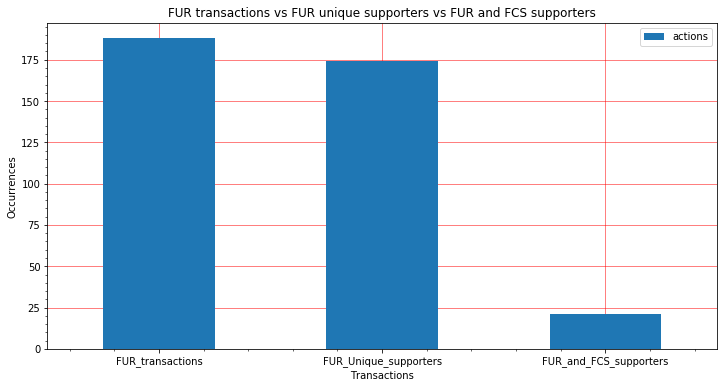

In [74]:
actions = [188, 174, 21]
index = ['FUR_transactions', 'FUR_Unique_supporters', 'FUR_and_FCS_supporters']
df = pd.DataFrame({'actions': actions}, index=index)
ax = df.plot.bar(rot=0, figsize=(12, 6))
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.xlabel("Transactions")
plt.ylabel('Occurrences')
plt.title("FUR transactions vs FUR unique supporters vs FUR and FCS supporters")

#### Some additional analysis....

In [75]:
# display the number of unique supporter IDs from all transaction data:
df_t_all.ACTIVITY_ID.nunique()

1144

As shown above, the total number of activity IDs for the transaction data is **1144**.  This contrasts significantly with the number of unique activity IDs for the sends broadcast data in March of **43**.

In [76]:
# This is the lone FUR supporter who does not have the 24029 ACTIVITY_ID (this person only has 1 transaction)
df_t_all.loc[df_t_all['ACTIVITY_ID'] == 15348].shape

(1, 21)

In the cell above, just checking to see all of the transactions for activity ID 15348.  This was the one activity ID that had a FUR transaction that was not activity ID number 24029.

In [77]:
# show those supporters who made a single donation and those who made a rucurring donation as well (fur = 1)
df1.loc[df1['fur'] == 1]

,supp_id,currency,fur,total_fcs,max_fcs,total_trans,sum_fcs,num_P,num_fs,num_c
1357,ZX9bzgQSuMWZkArzVWMSmA==,GBP,1,1,18.54,14,18.54,6.0,NaN,2.0
1376,aIBzXlUKyVOZkArzVWMSmA==,GBP,1,1,18.27,25,18.27,4.0,4.0,7.0
1975,W6fPIp%2BIr52ZkArzVWMSmA==,GBP,1,1,12.48,3,12.48,NaN,NaN,1.0
2686,9ELr8VlI1SWZkArzVWMSmA==,GBP,1,1,30.46,14,30.46,4.0,4.0,4.0
3947,4mvLUluixbWZkArzVWMSmA==,GBP,1,1,0.00,33,0.00,10.0,4.0,7.0
5655,wIblxqLLj4KZkArzVWMSmA==,GBP,1,1,12.18,21,12.18,3.0,4.0,4.0
6148,vesrts6C8N%2BZkArzVWMSmA==,GBP,1,1,6.15,24,6.15,3.0,4.0,5.0
6818,hZftL2QRnjKZkArzVWMSmA==,GBP,1,5,13.01,25,51.01,7.0,5.0,7.0
7041,sYywsBcB6gEqJI2ZMf1z3w==,GBP,1,1,12.46,22,12.46,5.0,2.0,5.0
7483,xW4XUujQsJyzFWMrHGgntg==,GBP,1,2,12.47,23,12.47,2.0,4.0,4.0


Something to note in the above dataframe:  the total transactions for all of these supporters is a high number.

In [78]:
df1.total_trans.describe()

count    22433.000000
mean         8.615878
std          8.008251
min          1.000000
25%          2.000000
50%          6.000000
75%         14.000000
max        158.000000
Name: total_trans, dtype: float64

In [79]:
df1.loc[df1['fur'] == 1].total_trans.describe()

count    21.000000
mean     17.761905
std       8.665476
min       3.000000
25%      12.000000
50%      21.000000
75%      24.000000
max      33.000000
Name: total_trans, dtype: float64

As shown above, the mean number of transactions for all FCS supporters is **14.5**, whereas the mean number of FCS supporters who also made a recurring donation (FUR) is **21.1**.

# Conclusion - Part 1

I wanted to use the dataframe below to perform machine learning / predictive analytics to try to find correlations between supporters who made FCS donations and those who made FUR donations.

However, there are only **21** supporters who made a FCS and FUR donation (from Cell number 15 above).  This is 21 supporters out of a total of **22433** (from cell 17) who made a FCS transaction.  This seems like too little data to run a ML algorithm.

Regardless, the framework / code is here to add to the dataframe below by creating more columns as needed.  See the dataframe below: 

In [80]:
df1.head(15)

,supp_id,currency,fur,total_fcs,max_fcs,total_trans,sum_fcs,num_P,num_fs,num_c
0,kudFmD%2ByF7w=,CAD,0,2,26.16,29,44.74,2.0,2.0,3.0
1,MpbERpuNCk0=,CAD,0,3,35.00,29,87.16,5.0,5.0,9.0
2,GJbnFkIn6SY=,CAD,0,2,14.96,6,29.76,1.0,1.0,1.0
3,4CmZuezC6hw=,CAD,0,2,40.73,18,59.11,1.0,3.0,3.0
4,ga9c44p8S04=,CAD,0,2,37.36,23,74.64,3.0,5.0,5.0
5,XLJ%2FwMXSyog=,USD,0,2,10.00,18,17.00,4.0,4.0,4.0
6,twfmRyzZ71Q=,CAD,0,1,186.63,29,186.63,3.0,4.0,4.0
7,iycV34Dms7Y=,CAD,0,1,40.69,30,40.69,3.0,4.0,4.0
8,7vyOVrtWxtw=,CAD,0,3,40.43,11,92.86,2.0,2.0,5.0
9,%2BxxiDTd77O0=,CAD,0,1,18.67,4,18.67,1.0,1.0,1.0


The above dataframe has all unique supporters who made a FCS transaction.  The columns are as follows:

  - supp_id = SUPPORTER_ID who made a FCS transaction
  - currency = currency of donation
  - fur = if supporter made at least 1 FUR transaction, a 1 is placed, otherwise 0
  - total_fcs = total FCS contribution amount in USD
  - max_fcs = maximum FCS contribution amount in USD
  - total_trans = total number of transactions made by that supporter
  - sum_fcs = number of FCS transactions total
  - num_P = number of 'P' transactions by the supporter
  - num_fs = number of 'formsub' transactions by the supporter
  - num_c = number of 'click' transactions by the supporter

# Machine Learning - predict a FUR transaction given all FCS supporter data  

One major caveat:  the FUR 1 or 0 does not consider if the FUR transaction occurred before or after the FCS transaction.

#### Logistic Regression:

In [81]:
df1 = df1.fillna(0)

In [82]:
df1.head()

,supp_id,currency,fur,total_fcs,max_fcs,total_trans,sum_fcs,num_P,num_fs,num_c
0,kudFmD%2ByF7w=,CAD,0,2,26.16,29,44.74,2.0,2.0,3.0
1,MpbERpuNCk0=,CAD,0,3,35.00,29,87.16,5.0,5.0,9.0
2,GJbnFkIn6SY=,CAD,0,2,14.96,6,29.76,1.0,1.0,1.0
3,4CmZuezC6hw=,CAD,0,2,40.73,18,59.11,1.0,3.0,3.0
4,ga9c44p8S04=,CAD,0,2,37.36,23,74.64,3.0,5.0,5.0


In [83]:
df1.shape

(22433, 10)

In [84]:
# find the number of fur's to drop, so that the number of fur's and fcs's are equal
n = df1.shape[0] 

In [85]:
# number of rows where fur equals 1
m = df1.loc[df1['fur'] == 1].shape[0]

In [86]:
# this is the number of rows that needs to be subtracted from df1 so that FURs = FCSs
number = n - m - m

In [87]:
print(number)

22391


In [88]:
# drop the correct amount of fur's so the number of FURs = FCSs.
# df1 = df1.drop(df1.query('fur == 0').sample(number).index)

In [89]:
df1.head()

,supp_id,currency,fur,total_fcs,max_fcs,total_trans,sum_fcs,num_P,num_fs,num_c
0,kudFmD%2ByF7w=,CAD,0,2,26.16,29,44.74,2.0,2.0,3.0
1,MpbERpuNCk0=,CAD,0,3,35.00,29,87.16,5.0,5.0,9.0
2,GJbnFkIn6SY=,CAD,0,2,14.96,6,29.76,1.0,1.0,1.0
3,4CmZuezC6hw=,CAD,0,2,40.73,18,59.11,1.0,3.0,3.0
4,ga9c44p8S04=,CAD,0,2,37.36,23,74.64,3.0,5.0,5.0


In [90]:
df1.shape

(22433, 10)

In [91]:
df2 = df1.loc[df1['fur'] == 1]

print(df2.shape)

df_repeated = pd.concat([df2]*1000, ignore_index=True)

df1 = pd.concat([df1, df_repeated], ignore_index=True)

(21, 10)


In [92]:
df1.shape

(43433, 10)

In [93]:
df1.sample(10)

,supp_id,currency,fur,total_fcs,max_fcs,total_trans,sum_fcs,num_P,num_fs,num_c
29010,4mvLUluixbWZkArzVWMSmA==,GBP,1,1,0.00,33,0.00,10.0,4.0,7.0
3810,EvliTzIrkFiZkArzVWMSmA==,USD,0,2,35.00,18,60.00,1.0,3.0,4.0
23555,xW4XUujQsJyzFWMrHGgntg==,GBP,1,2,12.47,23,12.47,2.0,4.0,4.0
38169,hZftL2QRnjKZkArzVWMSmA==,GBP,1,5,13.01,25,51.01,7.0,5.0,7.0
21034,V4N2tFBClxwqJI2ZMf1z3w==,GBP,0,1,3.91,1,3.91,0.0,0.0,0.0
39212,ZX9bzgQSuMWZkArzVWMSmA==,GBP,1,1,18.54,14,18.54,6.0,0.0,2.0
4684,gq751nPN4VCZkArzVWMSmA==,CAD,0,1,41.16,20,41.16,5.0,5.0,5.0
35004,sSGzNaMHa6aha0eWUOvjsw==,GBP,1,2,30.60,24,50.64,10.0,2.0,2.0
9786,npbaoO7h%2Fqy15xl1A%2FXc2A==,USD,0,1,20.00,1,20.00,0.0,0.0,0.0
42092,9ELr8VlI1SWZkArzVWMSmA==,GBP,1,1,30.46,14,30.46,4.0,4.0,4.0


In [94]:
# drop currency for now
df1.drop(columns=['currency'], inplace=True)
df1.drop(columns=['supp_id'], inplace=True)

# shuffle dataframe
df1 = df1.sample(frac=1)

In [95]:
# Create training and test sets.
offset = int(df1.shape[0] * 0.8)

df_train = df1[:offset]
df_test = df1[offset:]

In [96]:
df_train.shape

(34746, 8)

In [97]:
df_test.shape

(8687, 8)

In [98]:
# 1.  Logistic Regression

start_time = datetime.now()

# Instantiate our model.
regr = linear_model.LogisticRegression(solver='sag')

# set features and dependent variable for training data
y_train = df_train['fur'].values

# drop the 'target' column to obtain the feature inputs
df_train.drop(['fur'], axis=1, inplace=True)

# normalize the training data
x_train = sklearn.preprocessing.normalize(df_train)

# now for test...
y_test = df_test['fur'].values

# drop the 'target' column to obtain the feature inputs
df_test.drop(['fur'], axis=1, inplace=True)

# normalize the test data
x_test = sklearn.preprocessing.normalize(df_test)

# fit model to training data
regr.fit(x_train, y_train)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

C:\Users\Fred\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,



Duration: 0:00:00.838427


In [99]:
# create a variable that is the 1 or 0 prediction from the model 
y_test_pred = regr.predict(x_test)
sklearn.metrics.roc_auc_score(y_test, y_test_pred)

0.7302682449461808

In [100]:
# create the Confusion Matrix
sklearn.metrics.confusion_matrix(y_test, y_test_pred, labels=None, sample_weight=None)

array([[3316, 1114],
       [1226, 3031]], dtype=int64)

In [101]:
# determine the accuracy classification score
sklearn.metrics.accuracy_score(y_test, y_test_pred)

0.7306319788189248

#### Extra Trees Classifier

In [102]:
# 2.  Extra Trees Classifier

start_time = datetime.now()

from sklearn.ensemble import ExtraTreesClassifier

# Instantiate our model.
etc = ExtraTreesClassifier(n_estimators=1000)

# fit model to data
etc.fit(x_train, y_train)

from sklearn.metrics import confusion_matrix
sklearn.metrics.confusion_matrix(y_test, y_test_pred, labels=None, sample_weight=None)

end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))


Duration: 0:00:10.515118


In [103]:
y_test_pred = etc.predict(x_test)
sklearn.metrics.roc_auc_score(y_test, y_test_pred)

1.0

In [104]:
sklearn.metrics.confusion_matrix(y_test, y_test_pred, labels=None, sample_weight=None)

array([[4430,    0],
       [   0, 4257]], dtype=int64)

In [105]:
sklearn.metrics.accuracy_score(y_test, y_test_pred)

1.0

#### Random Forest Classifier

In [106]:
# 3.  Random Forest Classifier

start_time = datetime.now()

from sklearn.ensemble import RandomForestClassifier

# Instantiate our model.
rfc = RandomForestClassifier(n_estimators=1000)

# fit model to data
rfc.fit(x_train, y_train)

#------------------------------------------------------------------------------
sfm = SelectFromModel(rfc, threshold=0.001, max_features=7)
sfm.fit(x_train, y_train)
sfm.get_support()
selected_feat = df_train.columns[(sfm.get_support())]
len(selected_feat)
print(selected_feat)
#------------------------------------------------------------------------------

feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = df_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)


end_time = datetime.now()
print('\nDuration: {}'.format(end_time - start_time))

Index(['total_fcs', 'max_fcs', 'total_trans', 'sum_fcs', 'num_P', 'num_fs',
       'num_c'],
      dtype='object')

Duration: 0:00:34.404601


In [107]:
# using 'feature_importances_' from random forest
# these are the most important features and their relative importance for making the prediction
print((feature_importances).head(10))

             importance
num_P          0.191829
total_trans    0.164564
max_fcs        0.161160
num_c          0.142992
total_fcs      0.134446
sum_fcs        0.107944
num_fs         0.097065


In [108]:
y_test_pred = rfc.predict(x_test)
sklearn.metrics.roc_auc_score(y_test, y_test_pred)

1.0

In [109]:
sklearn.metrics.confusion_matrix(y_test, y_test_pred, labels=None, sample_weight=None)

array([[4430,    0],
       [   0, 4257]], dtype=int64)

In [110]:
sklearn.metrics.accuracy_score(y_test, y_test_pred)

1.0

# Conclusion - Part 2

So, I did end up doing some predictive modeling as shown above despite the sparse amount of supporters who made a single AND recurring contribution.  
The results can very significantly becasue each time the models are executed they are chosing only a small subset of the total data.  However, the accuracy measures have been in the range of **55 - 92%**.  This is just a starting point.  Two different scores were analyzed:  area under the roc curve and the accuracy classification score based on the Confusion Matrix.  

This accuracy represents the ability of each model to predict whether a supporter will make a recurring (FUR) donation based on the 7 featurers (columns in the final df1 dataframe) that were collected from the data.

# Addendum to Conclusion - Part 2  

Instead of dropping rows where the supporter made only a FCS contribution and not a FUR contribution, this notebook multiplies the number of rows where the supporter made both a FCS and FUR contribution.  The accuracy obtained for test data was **100%** for both the Extra Trees Classifier and the Random Forest Classifier method.  Here are the features with their corresponding relative importance:  

**Feature** -----> **Importance**
- num_P -----> 0.191829
- total_trans -----> 0.164564  
- max_fcs -----> 0.161160
- num_c -----> 0.142992
- total_fcs -----> 0.134446
- sum_fcs -----> 0.107944  
- num_fs -----> 0.097065  

